In [1]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
import sklearn
%matplotlib inline

2. **Importing and understanding our** **dataset**

In [2]:
data=pd.read_csv("/content/team3dataset.csv")

In [3]:
print(data["ST_Slope"].head())

0      Up
1    Flat
2      Up
3    Flat
4      Up
Name: ST_Slope, dtype: object


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
le_cp = LabelEncoder()
data['ChestPainType'] = le_cp.fit_transform(data['ChestPainType'])


le_sex = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])


le_ecg = LabelEncoder()
data['RestingECG'] = le_ecg.fit_transform(data['RestingECG'])


le_angina = LabelEncoder()
data['ExerciseAngina'] = le_angina.fit_transform(data['ExerciseAngina'])


le_st = LabelEncoder()
data['ST_Slope'] = le_st.fit_transform(data['ST_Slope'])


In [6]:
from scipy.stats.mstats import winsorize
data['Cholesterol'] = winsorize(data['Cholesterol'], limits=[0.05, 0.05])
data['MaxHR'] = winsorize(data['MaxHR'], limits=[0.05, 0.05])

In [7]:
data.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,196.040305,0.233115,0.989107,137.122004,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,104.170785,0.423046,0.631671,23.756497,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,333.000000,1.000000,2.000000,178.000000,1.000000,6.200000,2.000000,1.000000


In [8]:
data["HeartDisease"].describe()

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

In [9]:
data["HeartDisease"].unique()

array([0, 1])

Checking correlation between columns

In [10]:
print(data.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease      1.000000
ST_Slope          0.558771
ExerciseAngina    0.494282
Oldpeak           0.403951
MaxHR             0.403744
ChestPainType     0.386828
Sex               0.305445
Age               0.282039
FastingBS         0.267291
Cholesterol       0.247425
RestingBP         0.107589
RestingECG        0.057384
Name: HeartDisease, dtype: float64


Exploratory Data Analysis (EDA) First, analysing the target variable:

Counts DataFrame:
HeartDisease    0    1
Sex                   
0             143   50
1             267  458


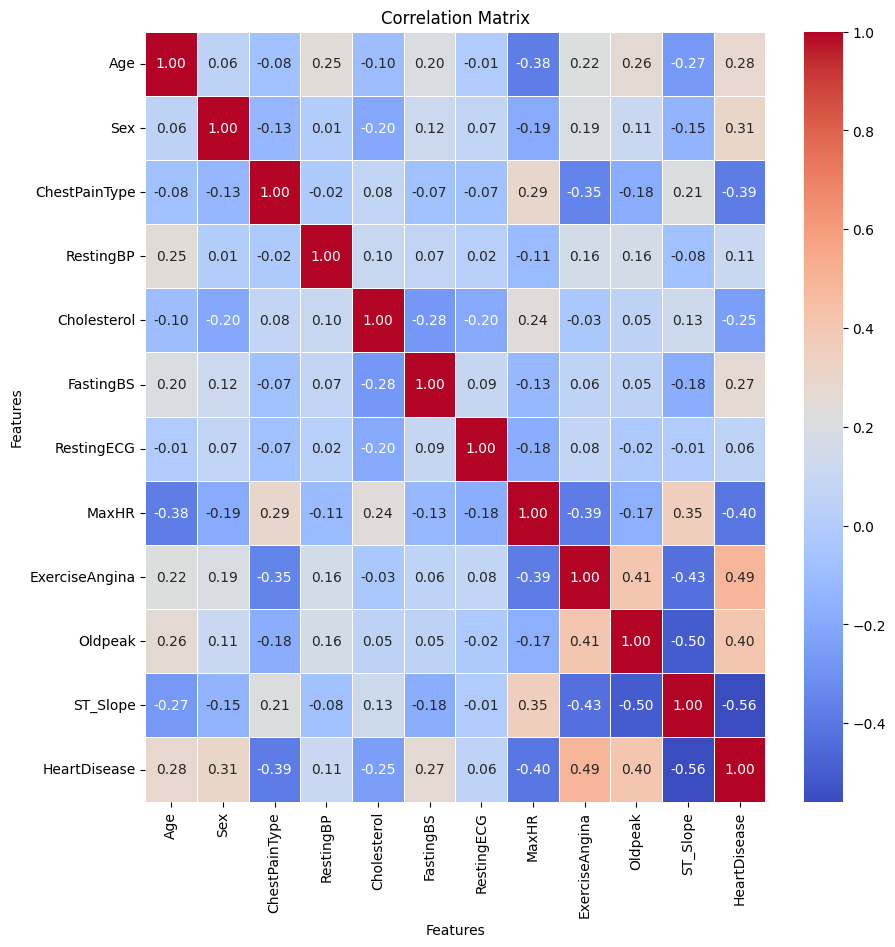

In [11]:
correlation_matrix = data.corr()

pt.figure(figsize=(10, 10))
sb.heatmap(correlation_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="coolwarm")
pt.title("Correlation Matrix")
pt.xlabel("Features")
pt.ylabel("Features")

counts = data.groupby(['Sex', 'HeartDisease']).size().unstack()

# Print counts DataFrame (for debugging)
print("Counts DataFrame:")
print(counts)



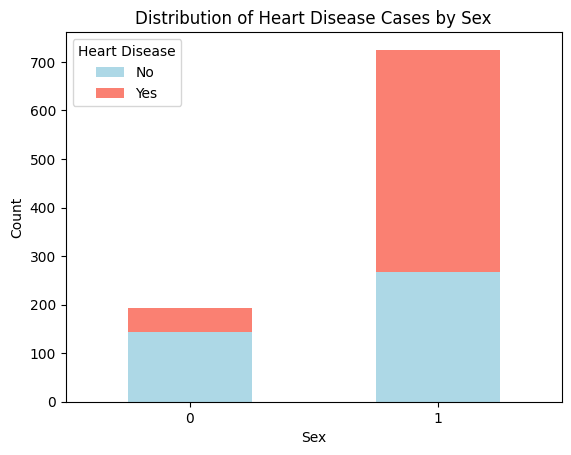

In [12]:
# Plot the grouped bar plot
counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
pt.title("Distribution of Heart Disease Cases by Sex")
pt.xlabel("Sex")
pt.ylabel("Count")
pt.xticks(rotation=0)
pt.legend(title="Heart Disease", labels=["No", "Yes"])

# Display the plot (optional: for local testing)
pt.show()

Text(0.5, 1.0, 'Age vs Heart Disease with Sex in a Violin Plot')

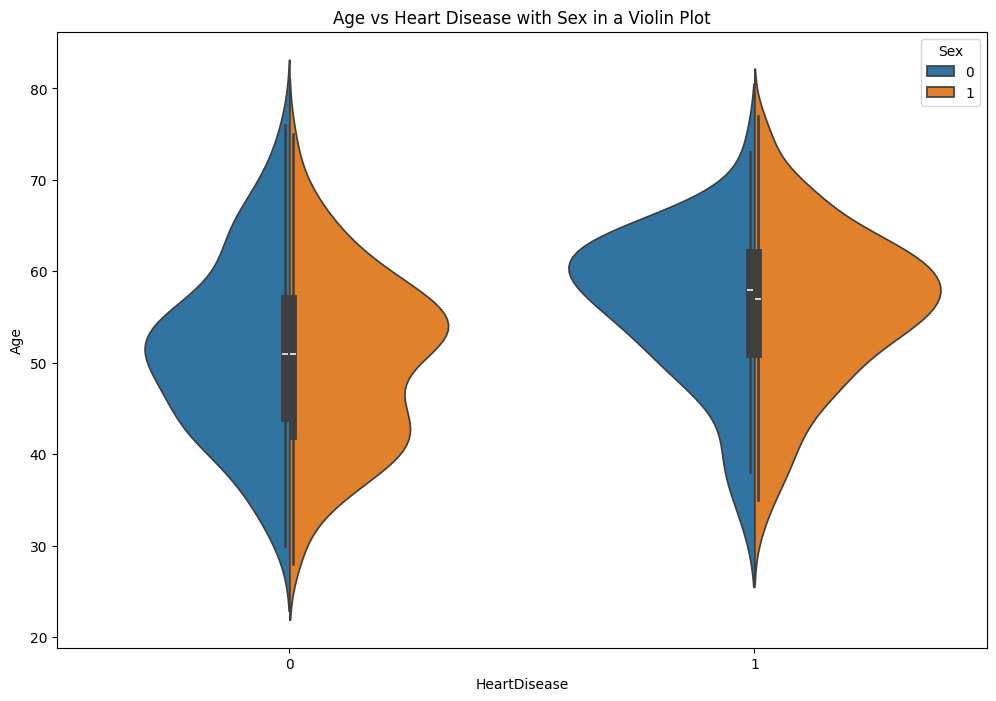

In [13]:
pt.figure(figsize=(12, 8))
sb.violinplot(x='HeartDisease', y='Age', data=data, hue='Sex', split=True)
pt.title('Age vs Heart Disease with Sex in a Violin Plot')

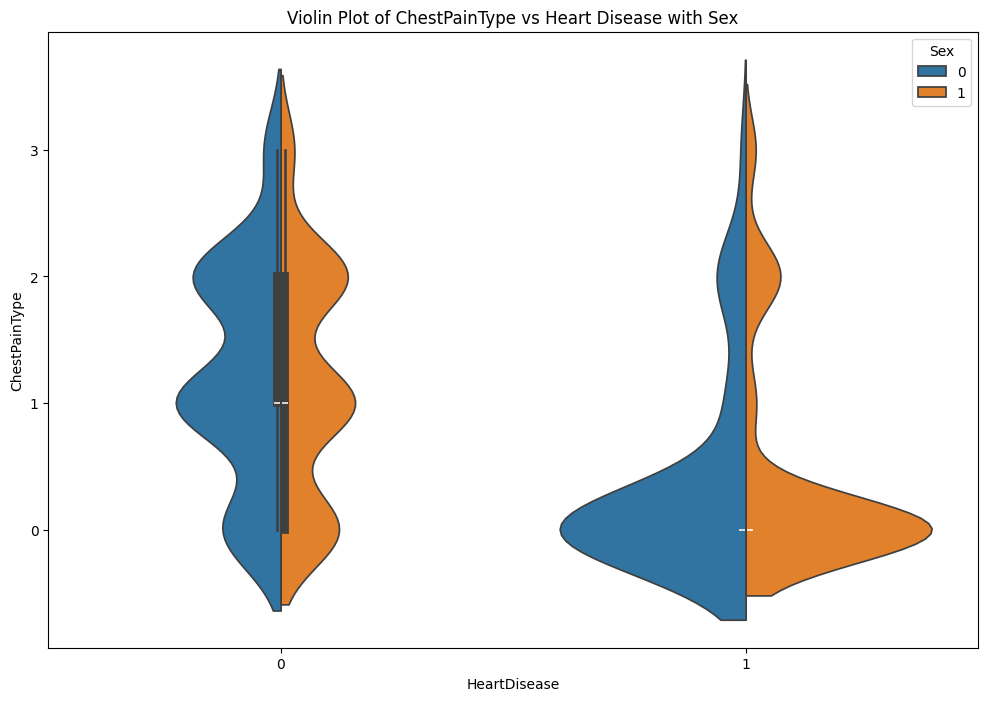

In [14]:
pt.figure(figsize=(12, 8))
sb.violinplot(x='HeartDisease', y='ChestPainType', data=data, hue='Sex', split=True)
pt.title('Violin Plot of ChestPainType vs Heart Disease with Sex')
pt.show()

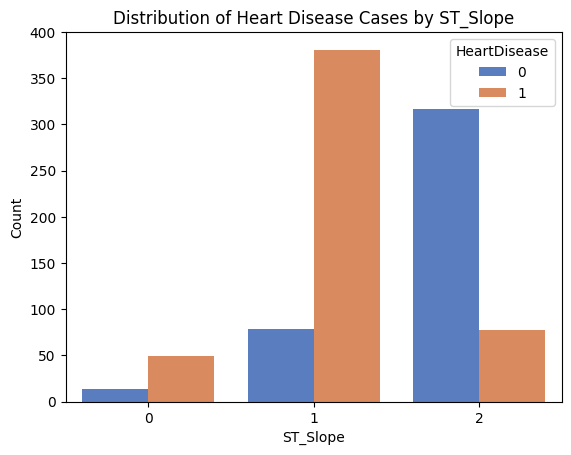

In [15]:
sb.countplot(x="ST_Slope", hue="HeartDisease", data=data, palette="muted")
pt.title("Distribution of Heart Disease Cases by ST_Slope")
pt.xlabel("ST_Slope")
pt.ylabel("Count")
pt.show()

<ipython-input-16-81f895690aa4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="ExerciseAngina", y="HeartDisease", data=data,palette="muted")


<Axes: xlabel='ExerciseAngina', ylabel='HeartDisease'>

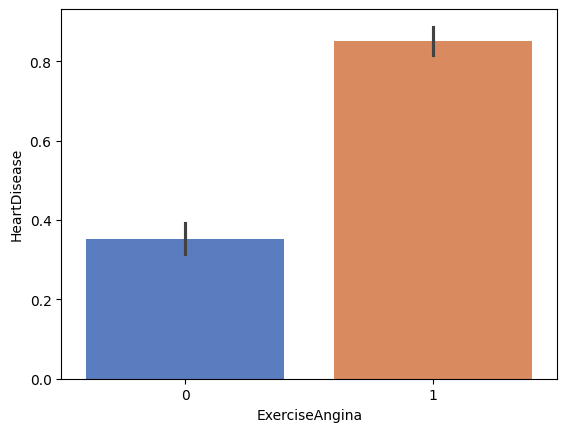

In [16]:
sb.barplot(x="ExerciseAngina", y="HeartDisease", data=data,palette="muted")

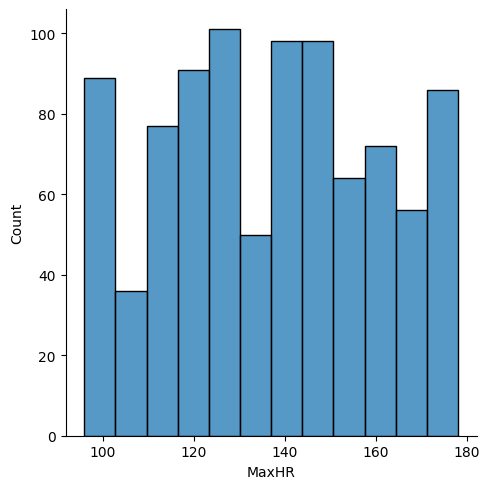

In [17]:
sb.displot(data["MaxHR"])

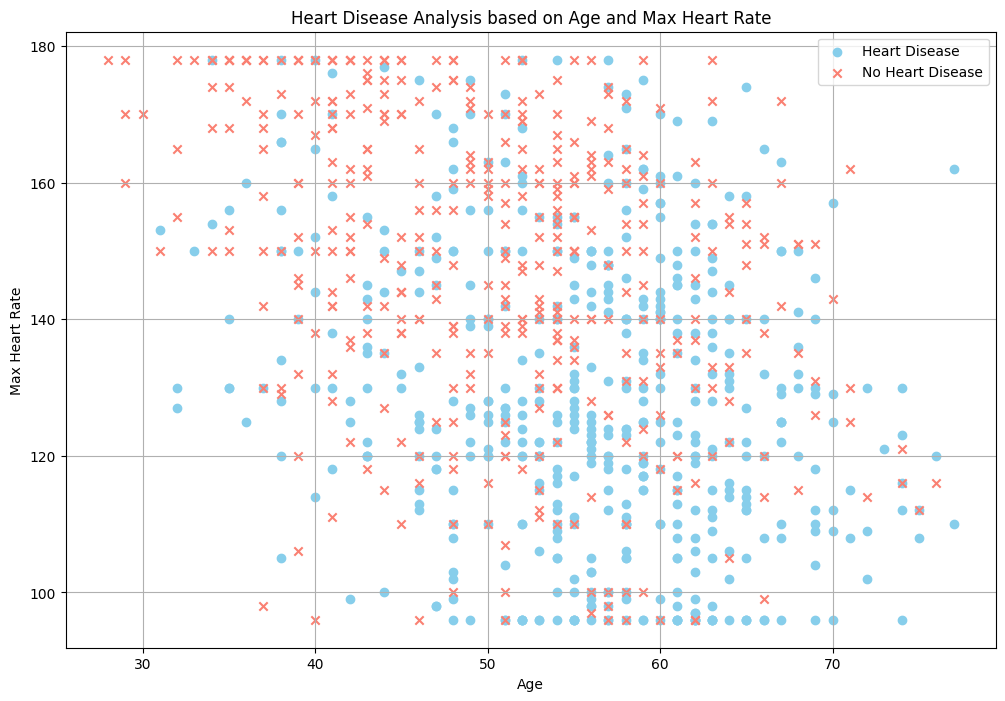

In [18]:
pt.figure(figsize=(12, 8))

# Changing the colors and marker for each scatter plot
pt.scatter(data.Age[data.HeartDisease==1], data.MaxHR[data.HeartDisease==1], c="skyblue", marker="o")
pt.scatter(data.Age[data.HeartDisease==0], data.MaxHR[data.HeartDisease==0], c="salmon", marker="x")

pt.title("Heart Disease Analysis based on Age and Max Heart Rate")
pt.xlabel("Age")
pt.ylabel("Max Heart Rate")
pt.legend(["Heart Disease", "No Heart Disease"], loc="upper right")
pt.grid(True)  # Adding gridlines
pt.show()


<ipython-input-19-9ca3b7921120>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.pointplot(x='ChestPainType', y='Cholesterol', hue='HeartDisease', data=data, dodge=True, ci='sd')


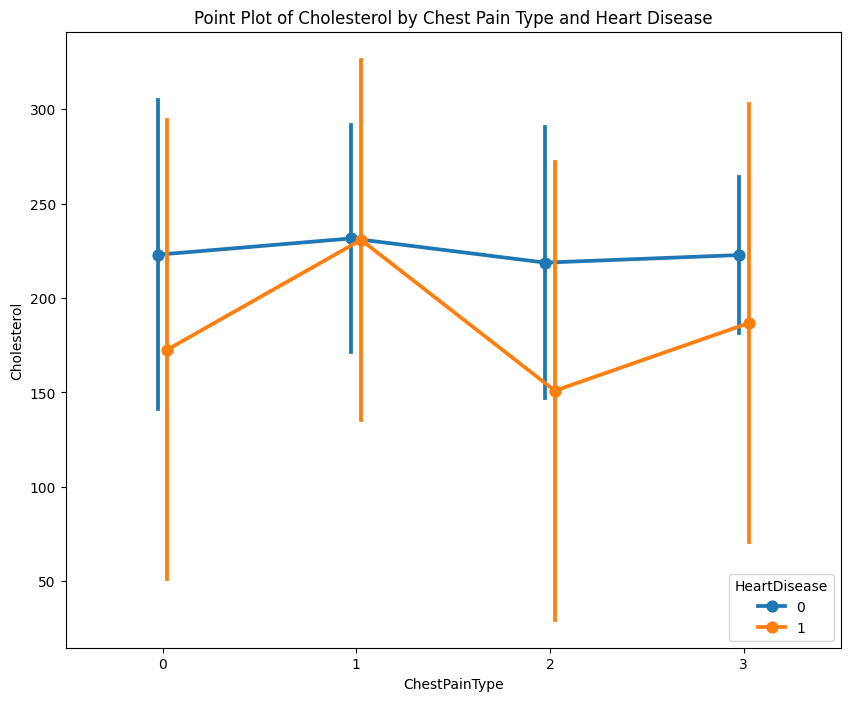

In [19]:
pt.figure(figsize=(10, 8))
sb.pointplot(x='ChestPainType', y='Cholesterol', hue='HeartDisease', data=data, dodge=True, ci='sd')
pt.title('Point Plot of Cholesterol by Chest Pain Type and Heart Disease')
pt.show()

<ipython-input-20-c8c0dd57245b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.pointplot(x='ChestPainType', y='RestingBP', hue='HeartDisease', data=data, dodge=True, ci='sd')


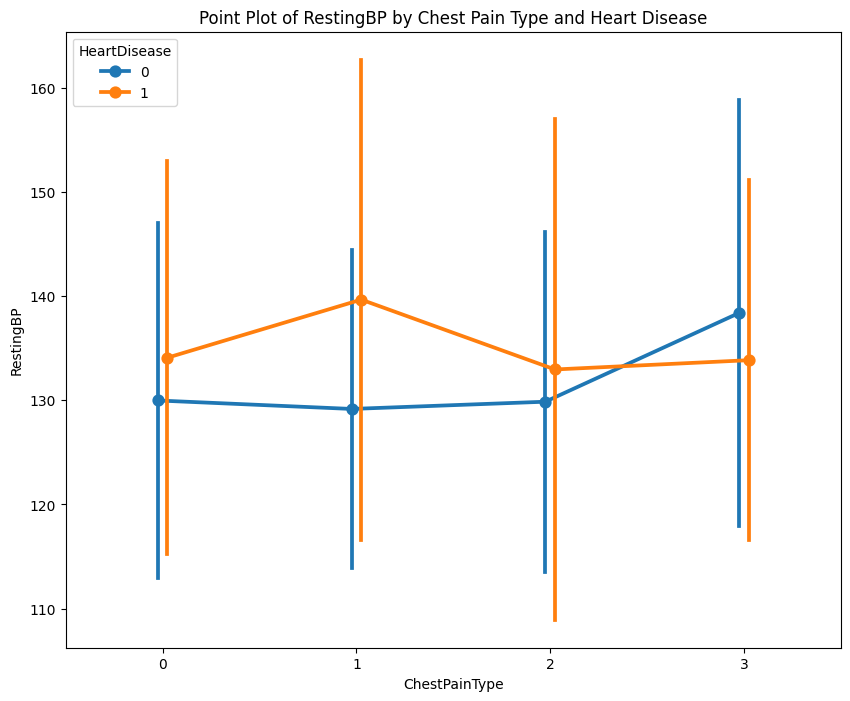

In [20]:
pt.figure(figsize=(10, 8))
sb.pointplot(x='ChestPainType', y='RestingBP', hue='HeartDisease', data=data, dodge=True, ci='sd')
pt.title('Point Plot of RestingBP by Chest Pain Type and Heart Disease')
pt.show()

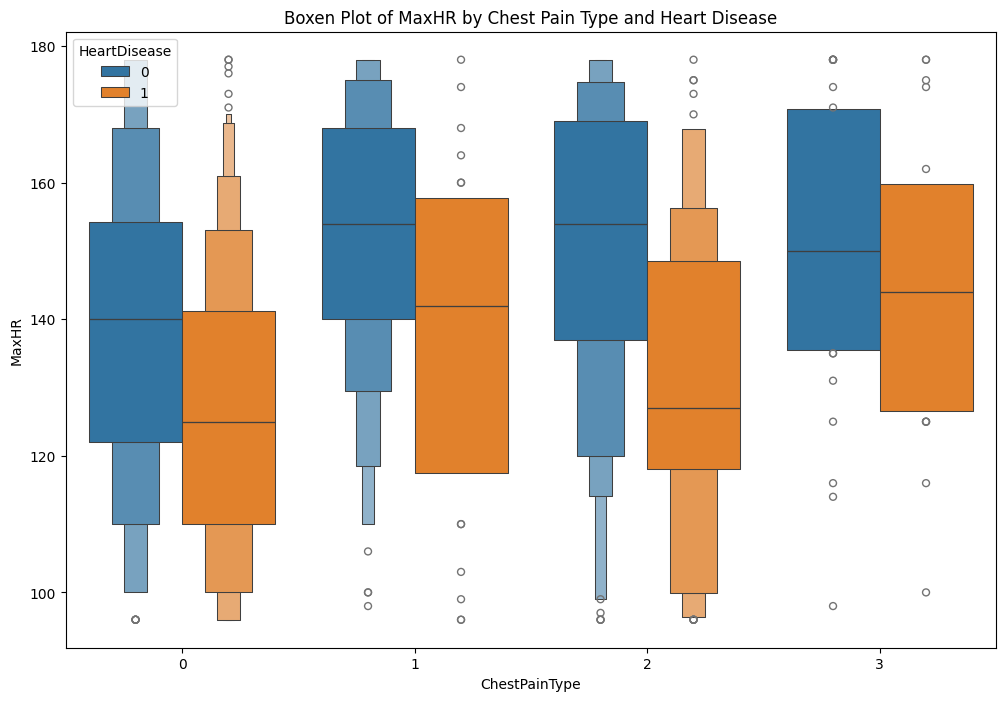

In [21]:
pt.figure(figsize=(12, 8))
sb.boxenplot(x='ChestPainType', y='MaxHR', data=data, hue='HeartDisease')
pt.title('Boxen Plot of MaxHR by Chest Pain Type and Heart Disease')
pt.show()

# Train Test split

In [22]:
from sklearn.model_selection import train_test_split

predictors = data.drop("HeartDisease",axis=1)
target = data["HeartDisease"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


### **Model Fitting**

### **1) Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the accuracy score obtained is: 84.24 %


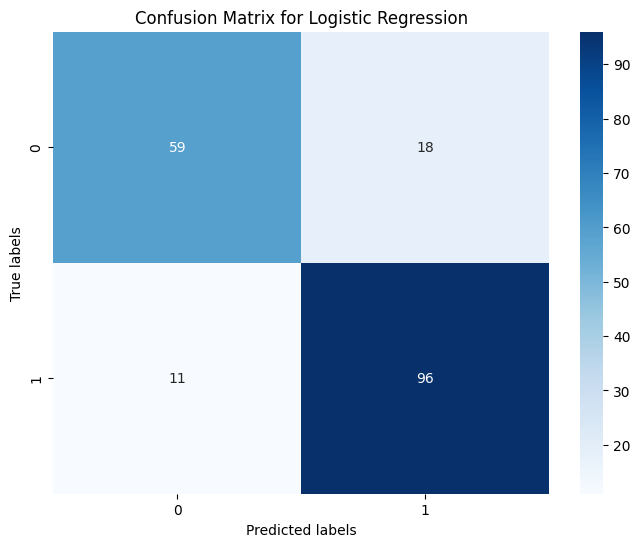

<ipython-input-23-bce136f5e5c7>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=['Logistic Regression'], y=[log_accuracy], palette='Blues')


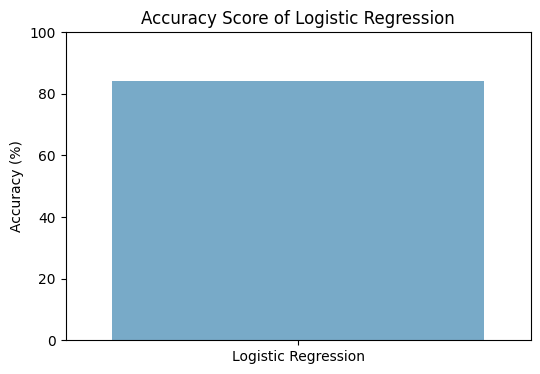

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_pred_LR = LR.predict(X_test)
Y_pred_LR.shape
log_accuracy = round(accuracy_score(Y_pred_LR,Y_test)*100,2)
print(f"the accuracy score obtained is: "+str(log_accuracy)+" %")

#new code


# Plot confusion matrix
cm = confusion_matrix(Y_test, Y_pred_LR)
pt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
pt.xlabel('Predicted labels')
pt.ylabel('True labels')
pt.title('Confusion Matrix for Logistic Regression')
pt.show()

# Plot accuracy score
pt.figure(figsize=(6, 4))
sb.barplot(x=['Logistic Regression'], y=[log_accuracy], palette='Blues')
pt.ylabel('Accuracy (%)')
pt.title('Accuracy Score of Logistic Regression')
pt.ylim(0, 100)
pt.show()

### **2) NB (Navie Bayes Algorithm)**

the accuracy score obtained is 84.24 %


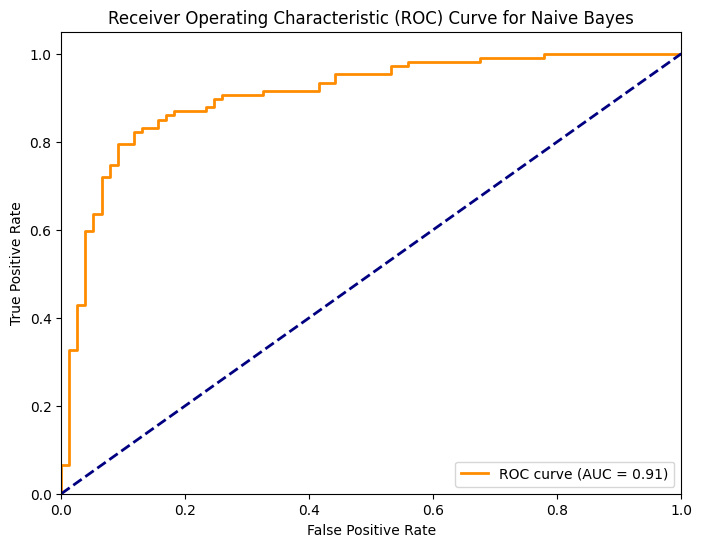

In [24]:
from sklearn.naive_bayes import GaussianNB

nbayes_model = GaussianNB()
nbayes_model.fit(X_train, Y_train)
pred_label__nb = nbayes_model.predict(X_test)
nbayes_accuracy = accuracy_score(Y_test, pred_label__nb)
nbayes_rounded_accuracy = round(nbayes_accuracy * 100, 2)
print(f"the accuracy score obtained is {nbayes_rounded_accuracy} %")

from sklearn.metrics import roc_curve, auc


# Predict probabilities for the positive class
nbayes_prob = nbayes_model.predict_proba(X_test)[:, 1]

# Calculating the false positive rate (fpr) and true positive rate (tpr)
fprate_nbayes, tprate_nbayes, threshold_nbayes = roc_curve(Y_test, nbayes_prob)

# Calculate the area under the ROC curve (AUC)
nbayes_auc = auc(fprate_nbayes, tprate_nbayes)

# Plot ROC curve
pt.figure(figsize=(8, 6))
pt.plot(fprate_nbayes, tprate_nbayes, color='darkorange', lw=2, label=f'ROC curve (AUC = {nbayes_auc:.2f})')
pt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
pt.xlim([0.0, 1.0])
pt.ylim([0.0, 1.05])
pt.xlabel('False Positive Rate')
pt.ylabel('True Positive Rate')
pt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
pt.legend(loc="lower right")
pt.show()


### **3) Support Vector Machine (SVM) Algorithm with Linear Kernel**

With the use of SVM the accuracy score obtained is  83.7 %


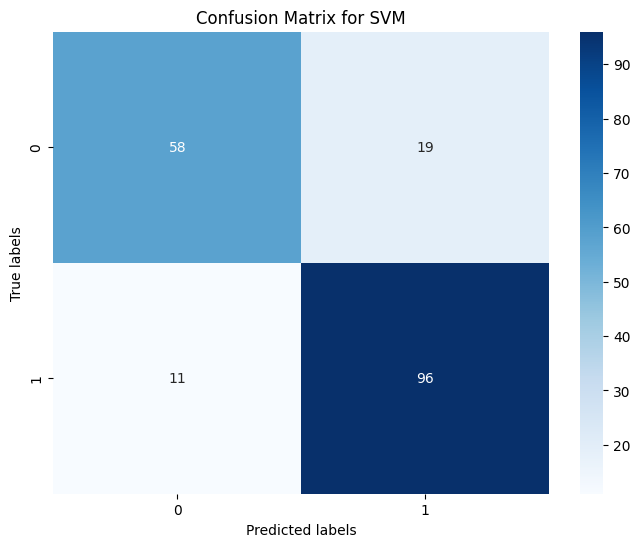

In [25]:
from sklearn import svm

svmachine_model = svm.SVC(kernel='linear')
svmachine_model.fit(X_train, Y_train)
pred_label_svm = svmachine_model.predict(X_test)
svmachine_accuracy= accuracy_score(Y_test, pred_label_svm)
svmachinerounded_accuracy = round(svmachine_accuracy * 100, 2)
print(f"With the use of SVM the accuracy score obtained is  {svmachinerounded_accuracy} %")

# Calculate confusion matrix
cm_svm = confusion_matrix(Y_test, pred_label_svm)

# Plot confusion matrix as heatmap
pt.figure(figsize=(8, 6))
sb.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
pt.xlabel('Predicted labels')
pt.ylabel('True labels')
pt.title('Confusion Matrix for SVM')
pt.show()

### **4) K Nearest Neighbors Algorithm**

 the accuracy score obtained is: 0.717391304347826 %


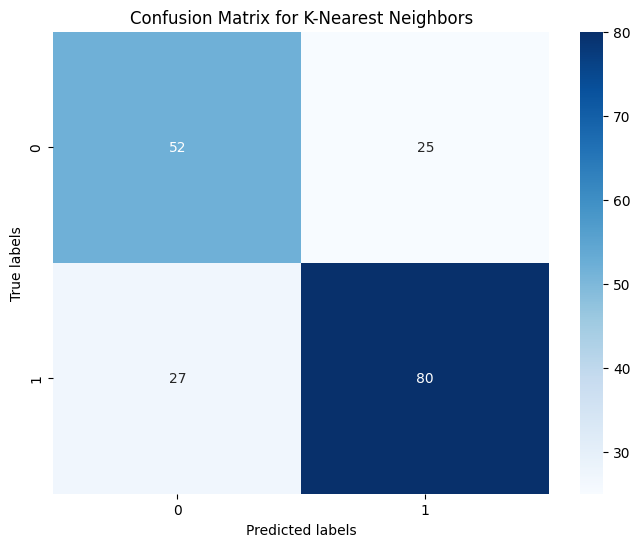

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knearest_model = KNeighborsClassifier(n_neighbors=7)
knearest_model.fit(X_train, Y_train)
pred_label_knearest = knearest_model.predict(X_test)
knearest_accuracy = accuracy_score(Y_test, pred_label_knearest)
knearest_rounded_accuracy = round(knearest_accuracy * 100, 2)
print(f" the accuracy score obtained is: {knearest_accuracy} %")

cm_knn = confusion_matrix(Y_test, pred_label_knearest)

# Plot confusion matrix as heatmap
pt.figure(figsize=(8, 6))
sb.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
pt.xlabel('Predicted labels')
pt.ylabel('True labels')
pt.title('Confusion Matrix for K-Nearest Neighbors')
pt.show()

### **5) LINEAR** **REGRESSION**

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_model = LinearRegression()

# Fit the model to the training data
lin_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = lin_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.1267979814170729
R-squared: 0.4789570993013206


### **6) Decision Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier


maximum_accuracy = 0
best_random_state = 0
accuracies = []

# Find the best random state
for random_state in range(200):
    dtree = DecisionTreeClassifier(random_state=random_state)
    dtree.fit(X_train, Y_train)
    Y_pred_dt = dtree.predict(X_test)
    CurrentAccuracy = round(accuracy_score(Y_test, Y_pred_dt) * 100, 2)

    if CurrentAccuracy > maximum_accuracy:
        maximum_accuracy = CurrentAccuracy
        best_random_state = random_state

# Train the model with the best random state
dtree_best = DecisionTreeClassifier(random_state=best_random_state)
dtree_best.fit(X_train, Y_train)
Y_pred_dtree_best = dtree_best.predict(X_test)
print(f"Best Random State: {best_random_state}")
print(f"Max Accuracy: {maximum_accuracy}")
print(f"Predictions Shape: {Y_pred_dtree_best.shape}")

dtree_accuracy = round(accuracy_score(Y_pred_dtree_best,Y_test)*100,2)

print(" the accuracy score obtained is: "+str(dtree_accuracy)+" %")

from sklearn.tree import DecisionTreeClassifier



# Find the best random state and collect accuracies
for random_state in range(200):
    dtree = DecisionTreeClassifier(random_state=random_state)
    dtree.fit(X_train, Y_train)
    Y_pred_dt = dtree.predict(X_test)
    CurrentAccuracy = round(accuracy_score(Y_test, Y_pred_dt) * 100, 2)

    # Store current accuracy
    accuracies.append(CurrentAccuracy)

    # Update max accuracy and best random state if current accuracy is higher
    if CurrentAccuracy > maximum_accuracy:
        maximum_accuracy = CurrentAccuracy
        best_random_state = random_state


Best Random State: 9
Max Accuracy: 78.26
Predictions Shape: (184,)
 the accuracy score obtained is: 78.26 %


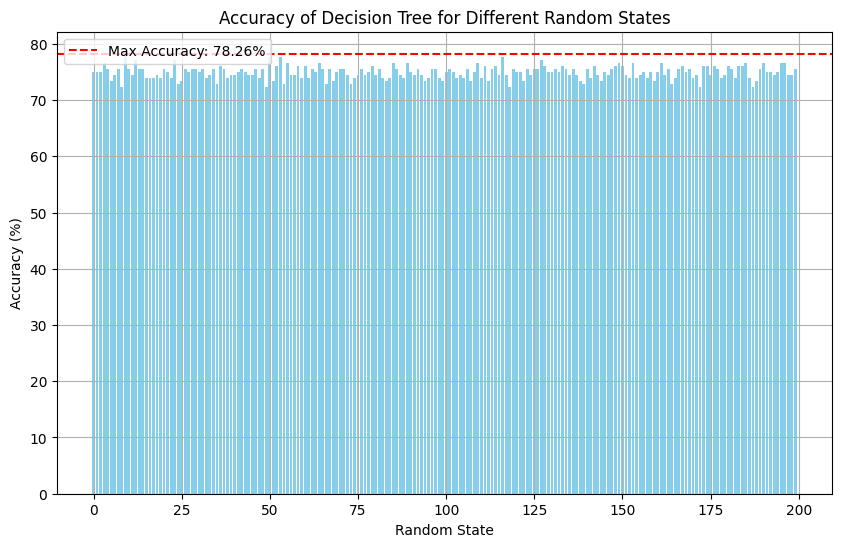

Best Random State: 9
Max Accuracy: 78.26%


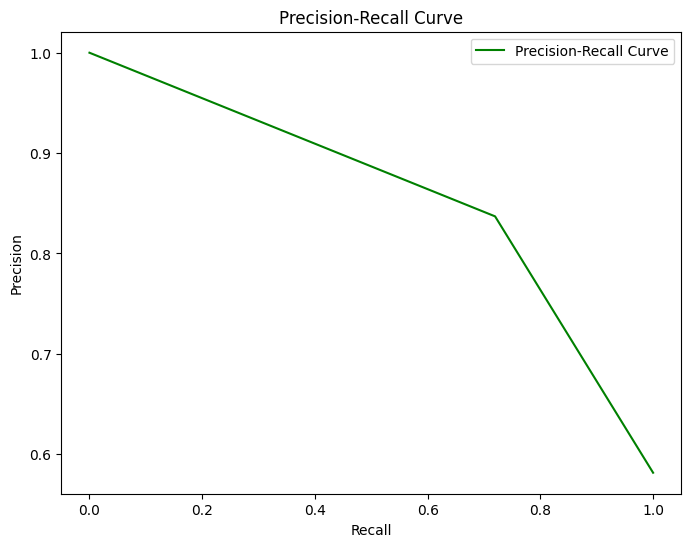

In [29]:
# Plotting the accuracies
pt.figure(figsize=(10, 6))
pt.bar(range(200), accuracies, color='skyblue')
pt.axhline(y=maximum_accuracy, color='red', linestyle='--', label=f'Max Accuracy: {maximum_accuracy}%')
pt.xlabel('Random State')
pt.ylabel('Accuracy (%)')
pt.title('Accuracy of Decision Tree for Different Random States')
pt.legend()
pt.grid(True)
pt.show()

# Print best random state and max accuracy
print(f"Best Random State: {best_random_state}")
print(f"Max Accuracy: {maximum_accuracy}%")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve, roc_auc_score

precision, recall, _ = precision_recall_curve(Y_test, Y_pred_dt)
pt.figure(figsize=(8, 6))
pt.plot(recall, precision, color='green', label='Precision-Recall Curve')
pt.xlabel('Recall')
pt.ylabel('Precision')
pt.title('Precision-Recall Curve')
pt.legend()
pt.show()

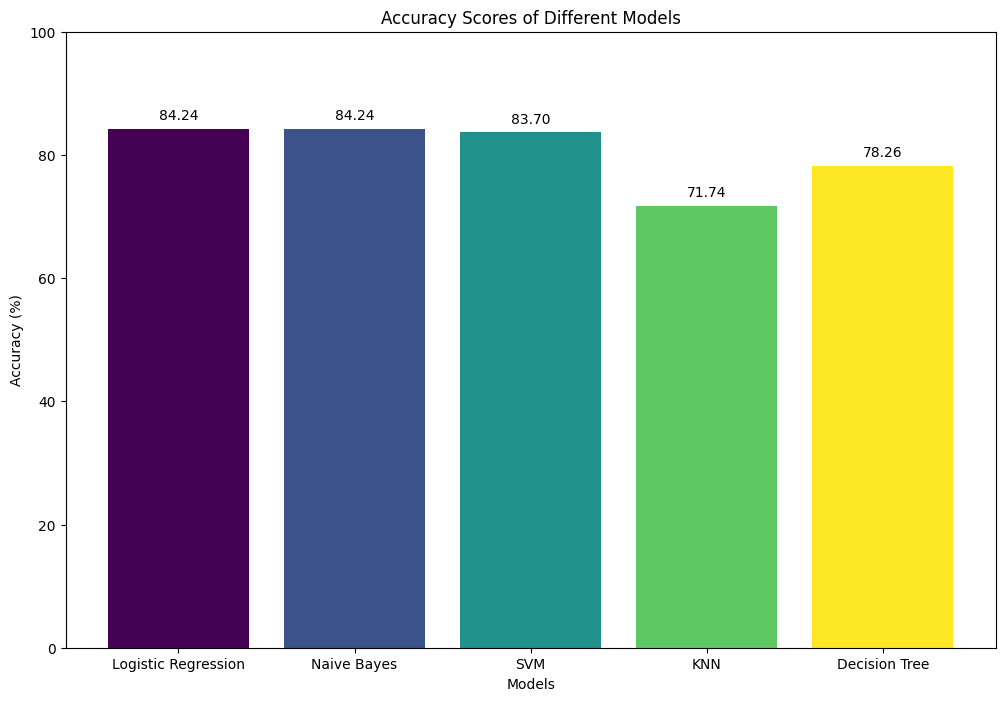

In [30]:
pred_models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree']
accuracy = [log_accuracy, nbayes_rounded_accuracy, svmachinerounded_accuracy, knearest_rounded_accuracy, dtree_accuracy]

colors = pt.cm.viridis(num.linspace(0, 1, len(pred_models)))

pt.figure(figsize=(12, 8))
bars = pt.bar(pred_models, accuracy, color=colors)
pt.xlabel('Models')
pt.ylabel('Accuracy (%)')
pt.title('Accuracy Scores of Different Models')
pt.ylim(0, 100)

# Adding the accuracy scores on top of the bars with a slight offset
for bar, acc in zip(bars, accuracy):
    pt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{acc:.2f}', ha='center', va='bottom')

pt.show()